# Perceptron trick
- it is used to draw line to classify the spread
- it has one problem that after a fixed point where it seprate the spread it stops , it does not improve it --> therefore we use sklearn logistic regression classify
as it improves itself and is more advanced

In [2]:
# taking dataset
from sklearn.datasets import make_classification
import numpy as np 
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,hypercube=False,random_state=42,class_sep=3)

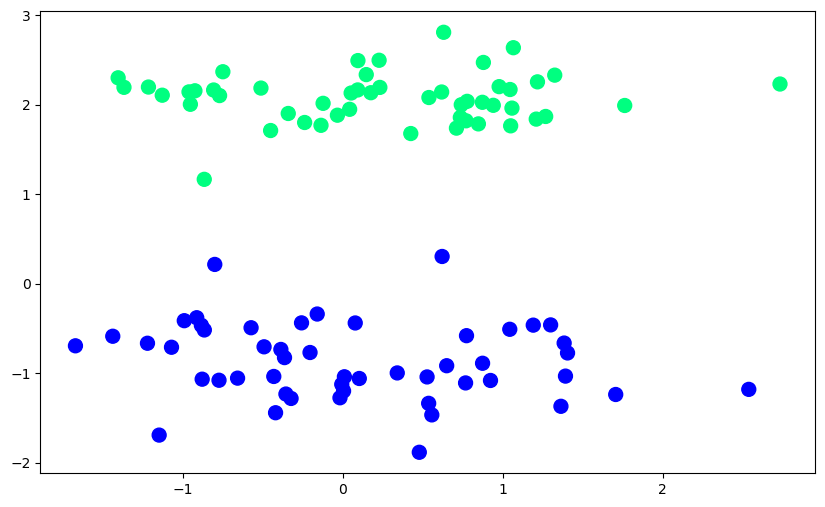

In [3]:
# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [62]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.01
    for i in range(10000):
        j=np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [63]:
def step(z):
    return 1 if z>0 else 0

In [64]:
intercept,coeff=perceptron(X,y)

In [65]:
print(intercept)
print(coeff)

-0.430000000000001
[0.09413188 1.21082573]


In [66]:
m = -(coeff[0]/coeff[1])
b = -(intercept/coeff[1])

In [67]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

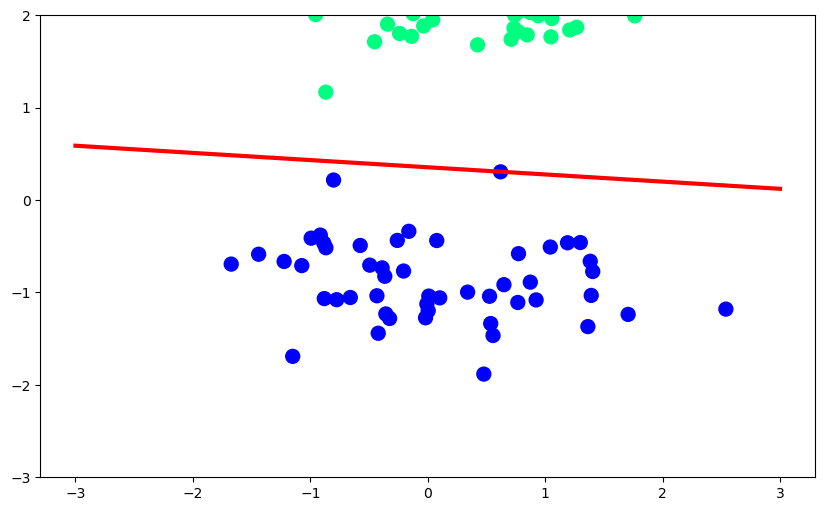

In [68]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [71]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [72]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

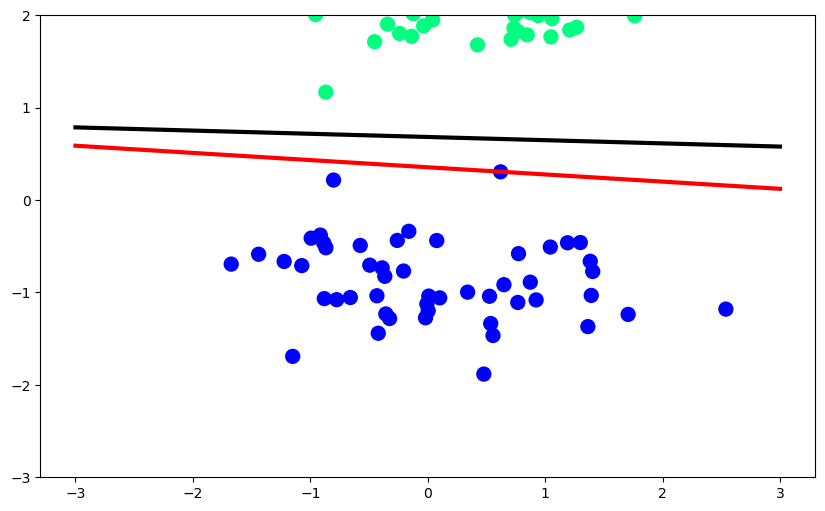

In [73]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# logistic regression is doing better than perceptron 